In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import missingno as msno
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

import time

import warnings
warnings.filterwarnings('ignore')

In [3]:
#讀入檔案
# path = '/kaggle/input/breast-cancer-wisconsin-data/data.csv'
path = '/Users/user/Desktop/data.csv'
dx = pd.read_csv(path)

In [4]:
#計算資料筆數與欄位數
dx.shape

(569, 32)

In [5]:
#顯示資料集前五筆
dx.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# #顯示所有欄位
# dx.columns

In [7]:
#顯示欄位資訊
dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
# 惡性良性腫瘤比例
value_counts = dx['diagnosis'].value_counts()
print(value_counts)

B    357
M    212
Name: diagnosis, dtype: int64


In [9]:
#刪去不必要欄位
df = dx.drop(['id'], axis = 1)

In [10]:
# import numpy as np

# def mod_outliers(df, factor=1.5):
#     # 选择数值型列
#     numeric_cols = df.select_dtypes(include=[np.number]).columns
    
#     # 计算每列的 IQR
#     Q1 = df[numeric_cols].quantile(0.25)
#     Q3 = df[numeric_cols].quantile(0.75)
#     IQR = Q3 - Q1
    
#     # 计算每列的下限和上限
#     lower_bound = Q1 - factor * IQR
#     upper_bound = Q3 + factor * IQR
    
#     # 创建副本并限制异常值
#     df_clipped = df.copy()
#     for col in numeric_cols:
#         # 使用每列单独的上下限来限制异常值
#         df_clipped[col] = df_clipped[col].clip(lower=lower_bound[col], upper=upper_bound[col])
    
#     print(f"使用 IQR * {factor} 限制异常值")
#     print(f"处理的列数: {len(numeric_cols)}")
    
#     return df_clipped

# # 使用函数
# df_cleaned = mod_outliers(df)


In [11]:
#刪除異常值
def mod_outliers(df, factor=1.5):
    
    # Select the numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    # Calculate the IQR
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate lower and upper limits
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    
    # Limit outliers
    df_clipped = df.copy()
    for col in numeric_cols:
        df_clipped[col] = df_clipped[col].clip(lower_bound[col], upper_bound[col])
    
    print(f"Outliers {factor} * was delimited using the IQR factor")
    print(f"Number of columns processed: {len(numeric_cols)}")
    
    return df_clipped

# Use Function
df_cleaned = mod_outliers(df)

# 無異常值！！

Outliers 1.5 * was delimited using the IQR factor
Number of columns processed: 30


In [12]:
#計算資料筆數與欄位數
df_cleaned.shape

(569, 31)

In [13]:
# 將目標變數 'diagnosis' 轉換為數值型
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# 確認轉換結果
print(df['diagnosis'].value_counts())

0    357
1    212
Name: diagnosis, dtype: int64


In [14]:
#顯示資料集前五筆
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
#顯示資料平均值、標準差、最大最小值等
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400



# 視覺化

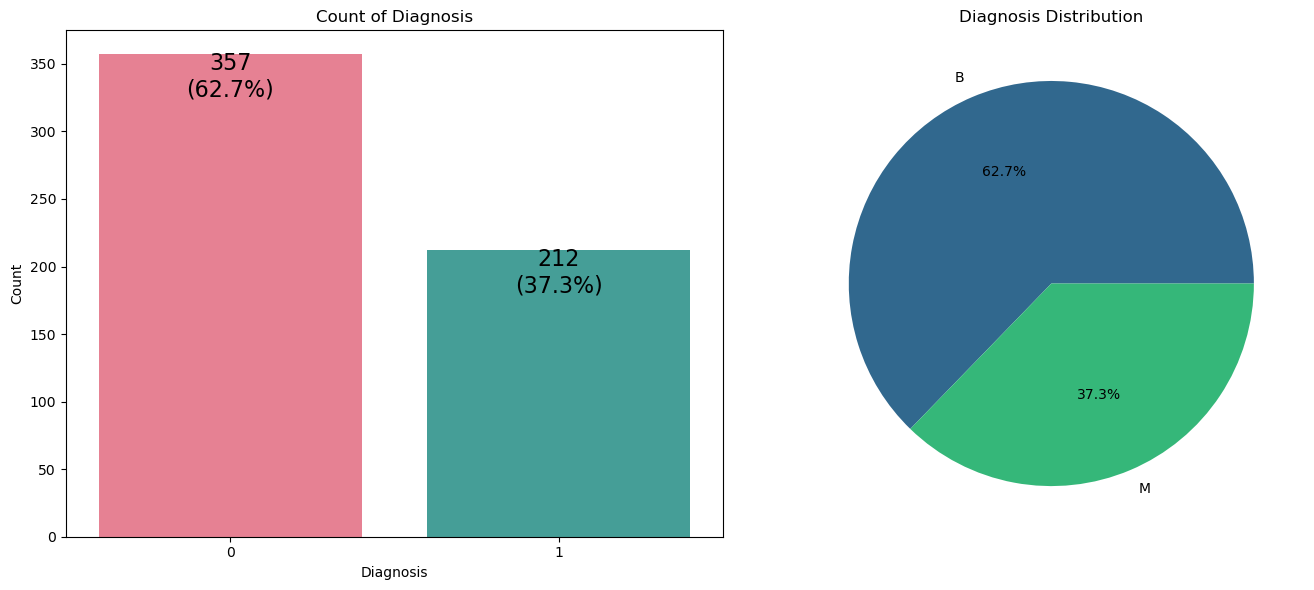

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (14,6))

#繪製左側直方圖
sns.countplot(data=df,
             x='diagnosis',
             palette= 'husl', 
             ax=ax[0],)
ax[0].set_title('Count of Diagnosis')
ax[0].set_xlabel('Diagnosis')
# 設定自定義的 X 軸標籤名稱
# ax[0].set_xticklabels(['B(惡性)', 'M(良性)'], fontsize=12)
ax[0].set_ylabel('Count')

# 添加比例標籤
total = len(df)
for p in ax[0].patches:
    count = p.get_height()  # 每個條形的高度（計數值）
    percentage = f'{count / total:.1%}'  # 計算比例
    ax[0].text(p.get_x() + p.get_width() / 2,  # X 位置
               count + 2,  # Y 位置（稍高於條形高度）
#                percentage,  # 顯示比例
               f'{count}\n({percentage})',  # 顯示個數和比例
               ha='center', va='top', fontsize=16, color='black')


#繪製右側圓餅圖
ax[1].pie(value_counts,
          labels=value_counts.index, 
          autopct='%1.1f%%', 
#            colors=sns.color_palette('husl', len(value_counts)))
           colors=sns.color_palette('viridis', len(value_counts)))
          
ax[1].set_title('Diagnosis Distribution')

plt.tight_layout()
plt.show()

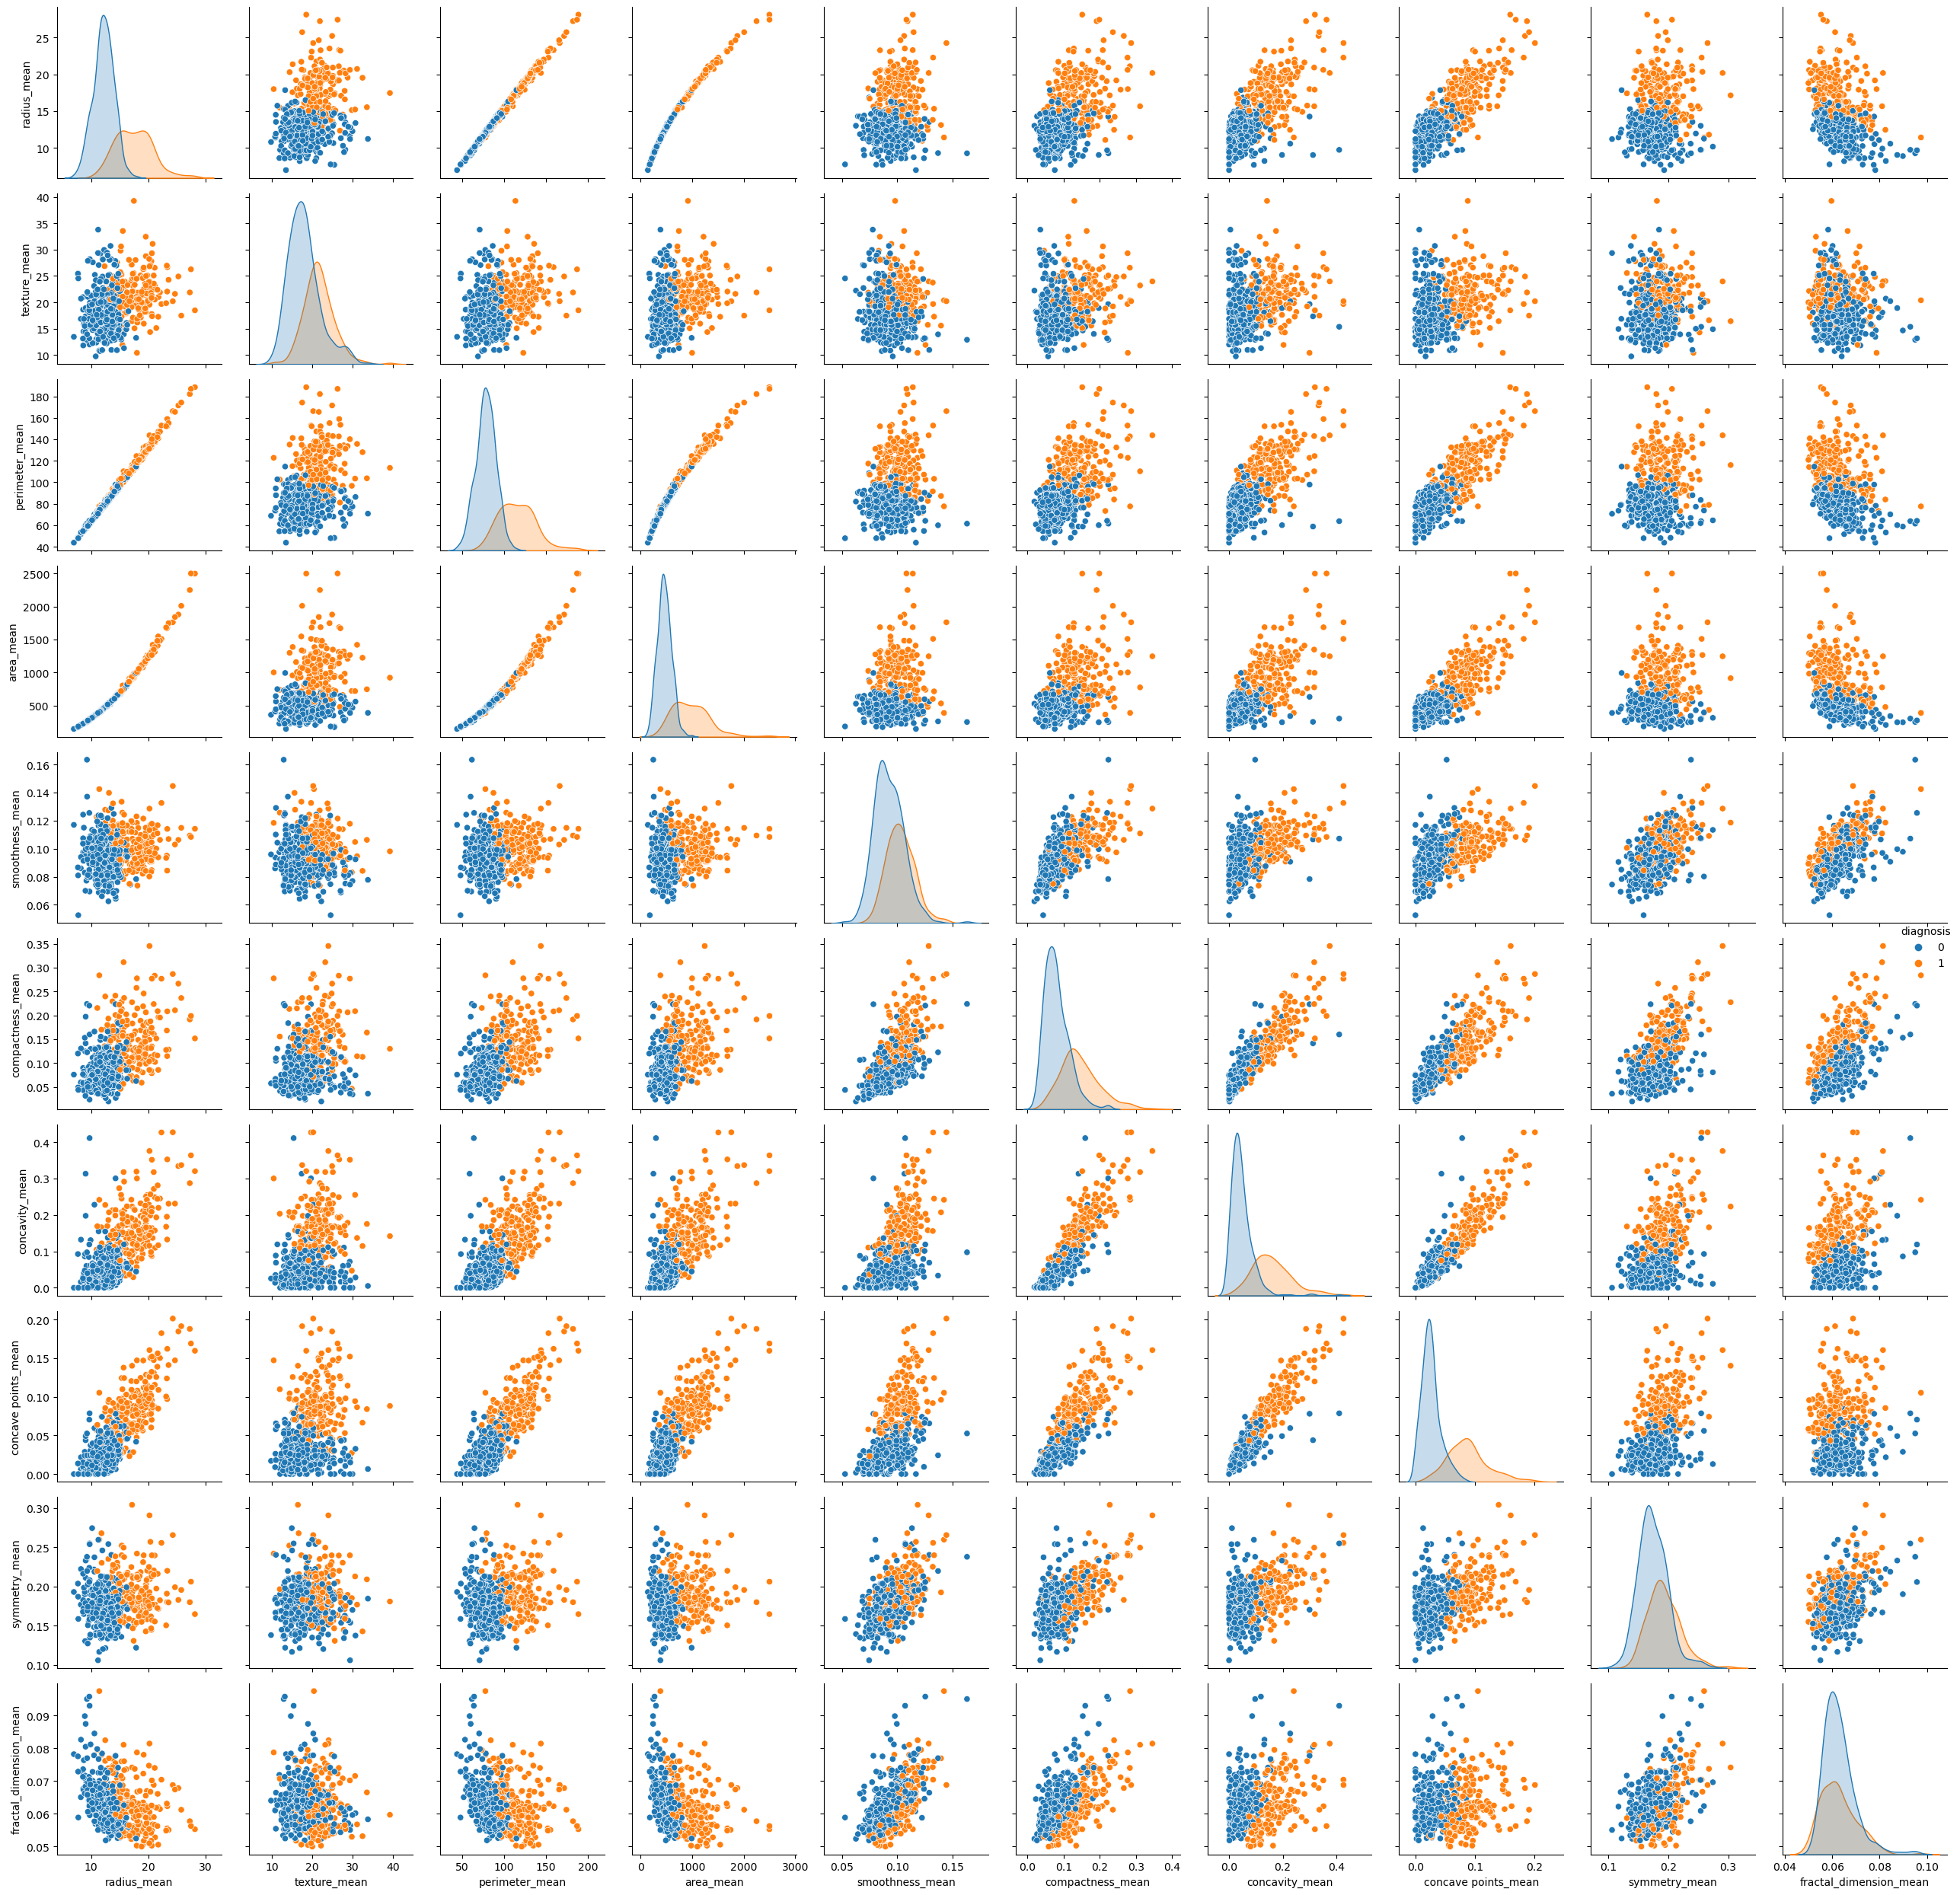

In [17]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
            'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 
            'fractal_dimension_mean']
sns.pairplot(df[features + ['diagnosis']], hue='diagnosis')
plt.tight_layout()
plt.savefig('scatter_plot.png', dpi = 300)
plt.show()
end_time = time.time()

#sns.pairplot(df[features + ['diagnosis']], hue='diagnosis', palette={'B': 'green', 'M': 'red'})

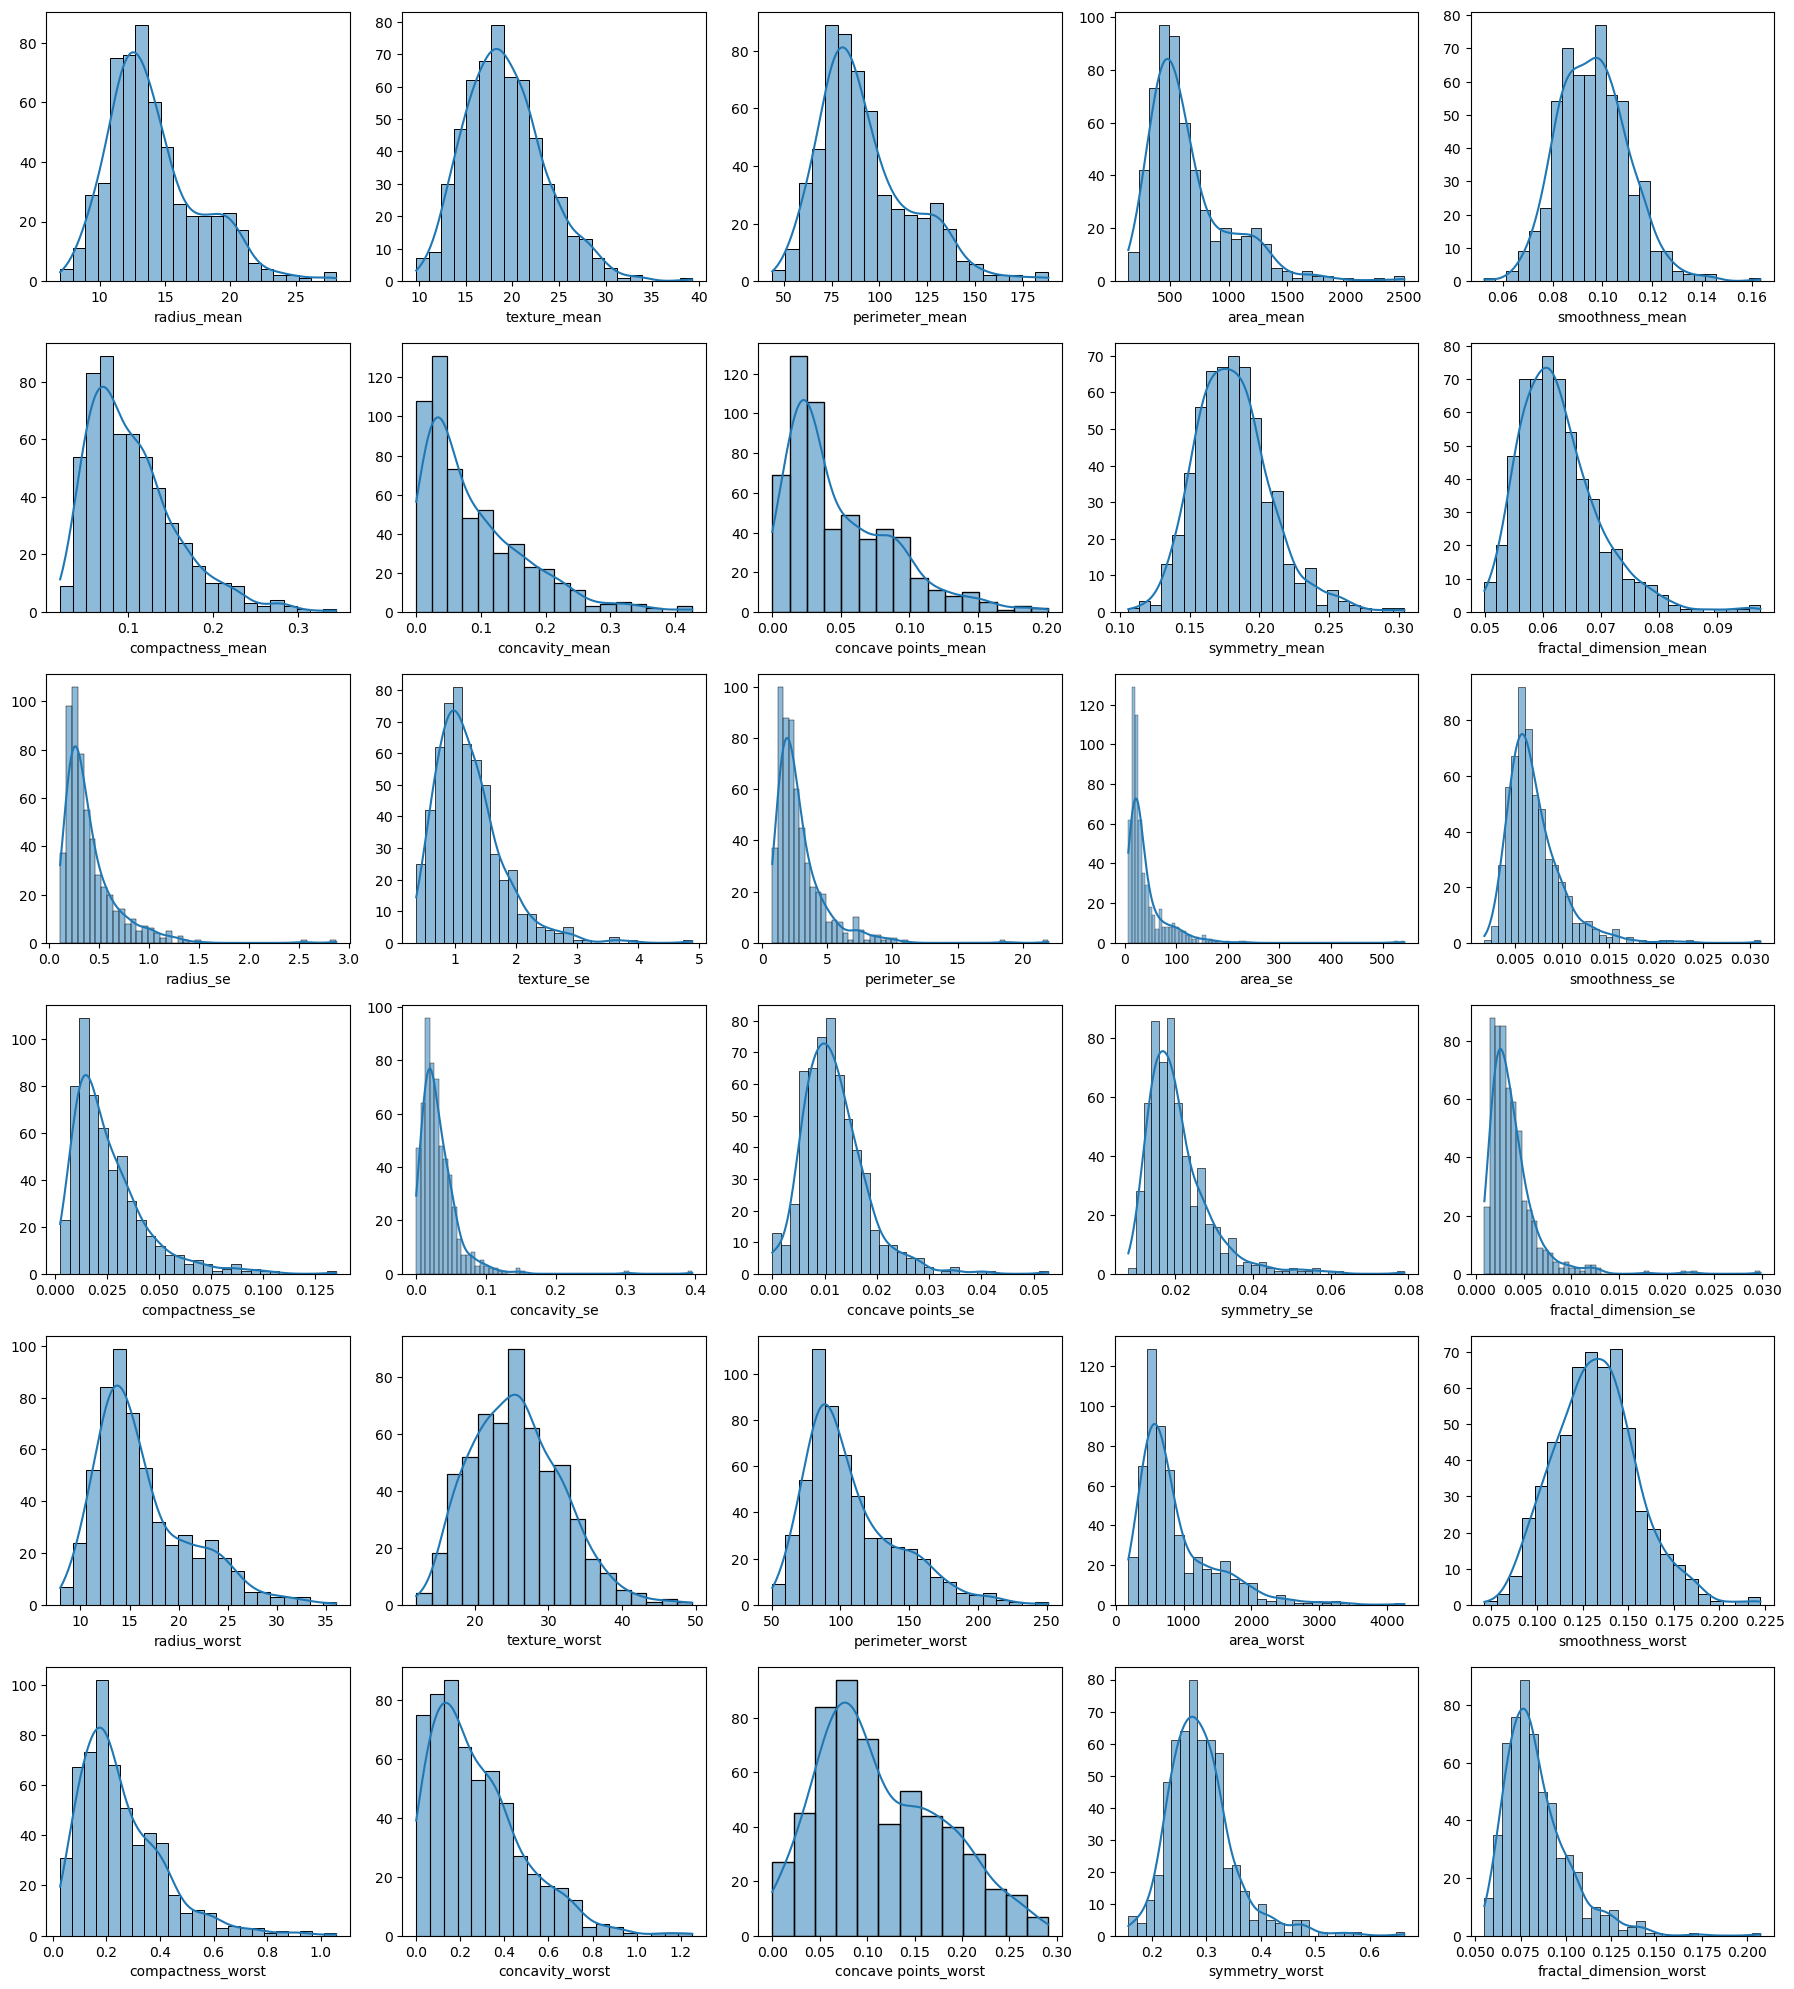

In [18]:


#刪除 diagnosis
X = df.drop('diagnosis', axis = 1)

def plot_distributions(X, n_cols=5, n_rows=6, figsize=(18, 20)):
    n_plots = n_cols * n_rows
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for i, (column, ax) in enumerate(zip(X.columns, axes)):
        if i < n_plots:
            sns.histplot(X[column], kde=True, ax=ax)
            ax.set_xlabel(column)
            ax.set_ylabel('')
        else:
            fig.delaxes(ax)

    plt.tight_layout()
    plt.savefig('plot_distributions.png', dpi = 300)
    plt.show()

plot_distributions(X)

In [19]:
# print(df.dtypes)

# # Select numeric columns
# numeric_columns = df.select_dtypes(include=[np.number]).columns
# df_numeric = df[numeric_columns]

# # Correlation Matrix
# corr = df_numeric.corr()

# plt.figure(figsize=(20,16))
# sns.set(style='white')

# mask = np.triu(np.ones_like(corr, dtype=bool))
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# sns.heatmap(corr,
#            mask=mask,
#            cmap=cmap,
#            vmax=1,
#            vmin=-1,
#            center=0,
#            square=True,
#            linewidths=.5,
#            cbar_kws={'shrink': .5},
#            annot=True,
#            fmt='.2f')

# plt.title('Correlation Matrix Heatmap', fontsize=16, pad=20)
# plt.tight_layout()
# plt.savefig('correlation_matrix_heatmap.png', dpi=300)
# plt.show()

# 篩選特徵

In [20]:
# # 去除剛相關性高的特徵

#設定高於92%
# def remove_highly_correlated_features(df, threshold=0.92):
    
#     # Calculate the correlation matrix and take its absolute values
#     corr_matrix = df_numeric.corr().abs()
    
#     # Create upper triangle mask
#     mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
#     # Mask the upper triangle to get only the lower triangle
#     tri_df = corr_matrix.mask(mask)
    
#     # Find columns with correlations exceeding the threshold value
#     to_drop = [col for col in tri_df.columns if any(tri_df[col] > threshold)]
    
#     # Remove highly correlated columns
#     df_reduced = df.drop(to_drop, axis=1)
    
#     print(f"The original DataFrame had {df.shape[1]} columns.")
#     print(f"Reduced DataFrame has {df_reduced.shape[1]} column.")
#     print(f"Number of columns removed: {len(to_drop)}")
    
#     return df_reduced

In [21]:
# df_reduced = remove_highly_correlated_features(df)

# 測試集、訓練集切分

In [22]:
# # 測試集、訓練集切分

# #取出 diagnosis 當輸出值
# y = dx['diagnosis']

# #刪除 diagnosis ，其餘皆當輸入值
# X = dx.drop('diagnosis', axis = 1)

In [23]:
# 測試集20%，其餘80%為訓練集
# random state 確保每次切分結果都一樣

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# 確認 diagnosis無缺失值
train_set = train_set.dropna(subset=['diagnosis'])
test_set = test_set.dropna(subset=['diagnosis'])

# 計算訓練集 train_set 中 'diagnosis' 列的分布
train_set_count = train_set['diagnosis'].value_counts()
# 計算測試集 test_set 中 'diagnosis' 列的分布
test_set_count = test_set['diagnosis'].value_counts()

print("Train set：")
print(train_set.shape)
print("\nTrain set：")
print(test_set.shape)

# 訓練集和測試集中的目标变量 diagnosis分布
print("Train set diagnosis distribution:")
print(train_set_count)

print("\nTest set diagnosis distribution:")
print(test_set_count)


Train set：
(455, 31)

Train set：
(114, 31)
Train set diagnosis distribution:
0    286
1    169
Name: diagnosis, dtype: int64

Test set diagnosis distribution:
0    71
1    43
Name: diagnosis, dtype: int64


In [25]:
#訓練集類別平衡

# 特徵與目標變量分離
X_train = train_set.drop('diagnosis', axis=1)
y_train = train_set['diagnosis']
X_test = test_set.drop('diagnosis', axis=1)
y_test = test_set['diagnosis']

# 使用 SMOTE 平衡訓練集
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# 查看平衡後的訓練集分布
train_set_count_balanced = pd.Series(y_train_balanced).value_counts()
print("\nBalanced train set diagnosis distribution using SMOTE:")
print(train_set_count_balanced)


Balanced train set diagnosis distribution using SMOTE:
0    286
1    286
Name: diagnosis, dtype: int64


In [26]:
# 正規化

#將數據做正規化，介於0-1之間
#避免特徵之間的數值範圍差異過大，影響模型性能（例如距離或梯度下降算法的收斂速度）

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_balanced)

# 测试集正则化（使用训练集的均值和标准差）
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

# value_counts = X_train['diagnosis'].value_counts()
# print(value_counts)

(572, 30)
(114, 30)


# Decision tree

In [27]:
dtx = DecisionTreeClassifier()
parameters = {
    'criterion': ['entropy'],
    'max_depth': 7,
    'min_samples_leaf': 2,
    'min_samples_split': 5,
    'splitter': ['random'],
}

In [28]:
#----參數----#
# criterion 確定決策樹將使用哪個 criteria 來拆分分支。'gini'：使用 Gini 雜質計算分割。它測量節點中實例的純度，並嘗試創建更純凈的（單類）節點。
#'entropy'：使用 entropy 評估分區。它使用資訊增益度量進行拆分，並嘗試最大化資訊增益。

# max_depth 確定樹的最大深度。更高的深度意味著模型更複雜，對數據集的適應性更強，但過擬合的風險會增加。
#較低的深度使模型更簡單且更具泛化性。

# min_samples_leaf 設置葉節點中必須存在的最小樣本數。這是停止分支所需的最小樣本數。
#值越高，創建的葉節點越大，模型的複雜性就越低

# min_samples_split 指定內部節點進一步拆分所需的最小樣本數。值越高，意味著拆分越少，樹的複雜度就越低。
#這有助於防止模型過度學習（過度擬合）。

# splitter 確定節點的拆分方式。'best'：選擇最佳分割。在每個節點上，它根據可用標準進行最佳拆分。
#'random'：選擇隨機拆分。在每個節點上，它會評估一定數量的隨機拆分選項並選擇最佳選項。這可以增加模型的多樣性並減少過度學習。

# AdaBoost

In [29]:
# AdaBoost
ada = AdaBoostClassifier(base_estimator = dtx)
ada = AdaBoostClassifier(dtx, n_estimators=50)
ada.fit(X_train_scaled, y_train_balanced)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [30]:
y_pred_ada = ada.predict(X_test_scaled)

In [31]:
# 評估指標
accuracy = accuracy_score(y_test, y_pred_ada)
precision = precision_score(y_test, y_pred_ada, average='weighted')
recall = recall_score(y_test, y_pred_ada, average='weighted')
f1 = f1_score(y_test, y_pred_ada, average='weighted')

# print('ADABoost Accuracy Score on X_train =', accuracy_score(y_train, ada.predict(X_train)))
# print('ADABoost Accuracy Score on X_test =', accuracy_score(y_test, ada.predict(X_test)))

print(f'ADABoost Accuracy: {accuracy:.2f}')
print(f'ADABoost Precision: {precision:.2f}')
print(f'ADABoost Recall: {recall:.2f}')
print(f'ADABoost F1-Score: {f1:.2f}')

ADABoost Accuracy: 0.94
ADABoost Precision: 0.94
ADABoost Recall: 0.94
ADABoost F1-Score: 0.94


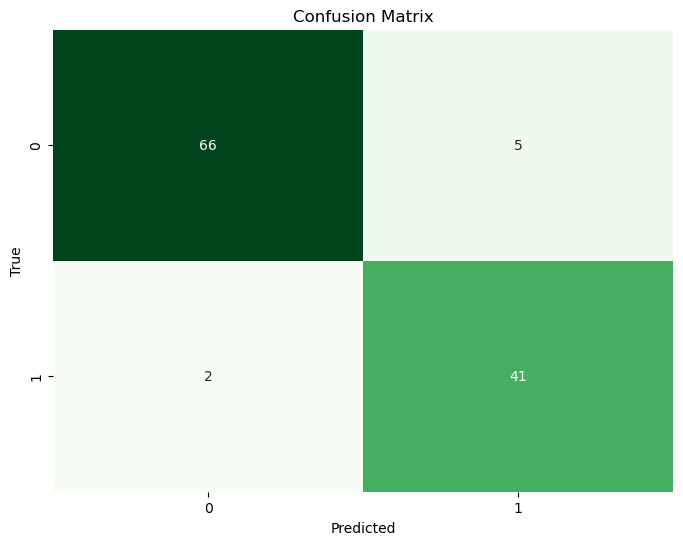

In [32]:
#混淆矩陣
cm_ada = confusion_matrix(y_test, y_pred_ada)

plt.figure(figsize=(8,6))
sns.heatmap(cm_ada, annot=True, cmap='Greens', fmt='g', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

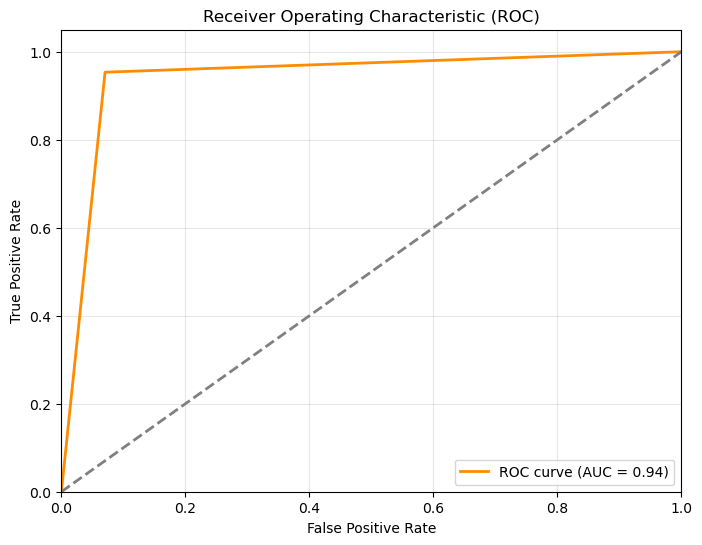

In [33]:
# 繪製 ROC 曲線
y_pred_prob_ada = ada.predict_proba(X_test_scaled)[:, 1]  # 獲取正類別的預測機率

# 計算 FPR 和 TPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_ada)
roc_auc = auc(fpr, tpr)

# 繪製 ROC 曲線
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # 基準線
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)  # 增加網格方便觀察
plt.show()


Epoch 1: Train Accuracy = 1.0000, Test Accuracy = 0.9474

Final Model Train Accuracy: 1.0000
Final Model Test Accuracy: 0.9474


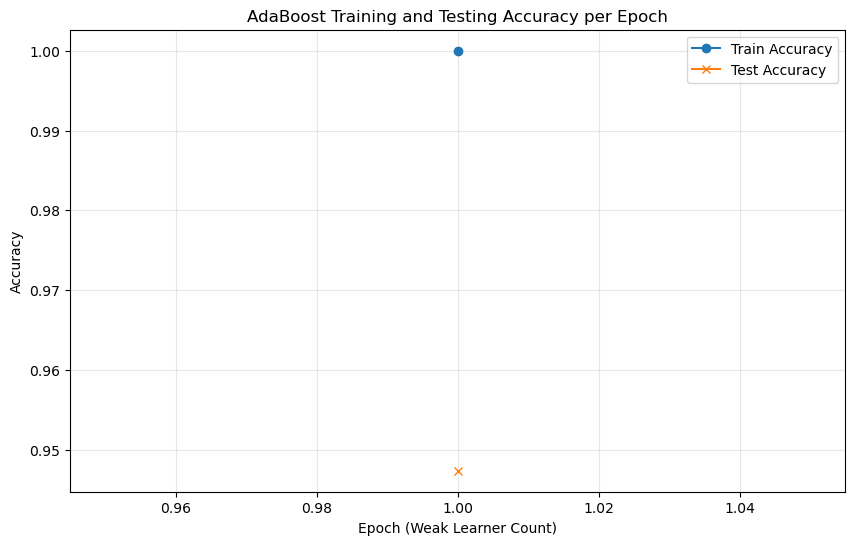

In [34]:
# 自定義方法以監控每個階段的準確率
from sklearn.metrics import accuracy_score

# 初始化 AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=dtx, n_estimators=180, random_state=42)

# 記錄每個階段的訓練準確率
staged_train_accuracies = []
staged_test_accuracies = []

# 訓練模型並記錄分階段準確率
for i, (weak_clf, alpha) in enumerate(zip(ada.fit(X_train_scaled, y_train_balanced).estimators_, ada.estimator_weights_)):
    # 弱分類器的累積預測（加權投票）
    y_train_pred = np.sign(sum(clf.predict(X_train_scaled) * alpha for clf, alpha in zip(ada.estimators_[:i+1], ada.estimator_weights_[:i+1])))
    y_test_pred = np.sign(sum(clf.predict(X_test_scaled) * alpha for clf, alpha in zip(ada.estimators_[:i+1], ada.estimator_weights_[:i+1])))

    # 計算準確率
    train_acc = accuracy_score(y_train_balanced, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    staged_train_accuracies.append(train_acc)
    staged_test_accuracies.append(test_acc)

    # 每個 epoch 顯示準確率
    print(f'Epoch {i+1}: Train Accuracy = {train_acc:.4f}, Test Accuracy = {test_acc:.4f}')

# 最終模型整體表現
print(f"\nFinal Model Train Accuracy: {staged_train_accuracies[-1]:.4f}")
print(f"Final Model Test Accuracy: {staged_test_accuracies[-1]:.4f}")

# 可視化分階段準確率
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(staged_train_accuracies) + 1), staged_train_accuracies, label='Train Accuracy', marker='o')
plt.plot(range(1, len(staged_test_accuracies) + 1), staged_test_accuracies, label='Test Accuracy', marker='x')
plt.title('AdaBoost Training and Testing Accuracy per Epoch')
plt.xlabel('Epoch (Weak Learner Count)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [35]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        71
           1       0.89      0.95      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



# 五折交叉驗證

In [36]:
# 假設 df 是你的原始資料集，並且目標變數是 'diagnosis'
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# 初始化 KFold 進行五折交叉驗證
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 記錄每一折的準確度
accuracies = []

# 五折交叉驗證
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    # 分割訓練集與測試集
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 對訓練集進行正規化
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    # 對測試集也使用相同的標準化參數
    X_test_scaled = scaler.transform(X_test)
    
    # 訓練模型
    ada.fit(X_train_scaled, y_train)
    
    # 測試模型並計算準確度
    y_pred = ada.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    print(f"Fold {fold} Accuracy: {accuracy:.2f}")

# 計算五折交叉驗證的平均準確度
mean_accuracy = sum(accuracies) / len(accuracies)
print(f"\nAverage Accuracy across 5-folds: {mean_accuracy:.2f}")

Fold 1 Accuracy: 0.94
Fold 2 Accuracy: 0.96
Fold 3 Accuracy: 0.93
Fold 4 Accuracy: 0.95
Fold 5 Accuracy: 0.92

Average Accuracy across 5-folds: 0.94


# 特徵重要性

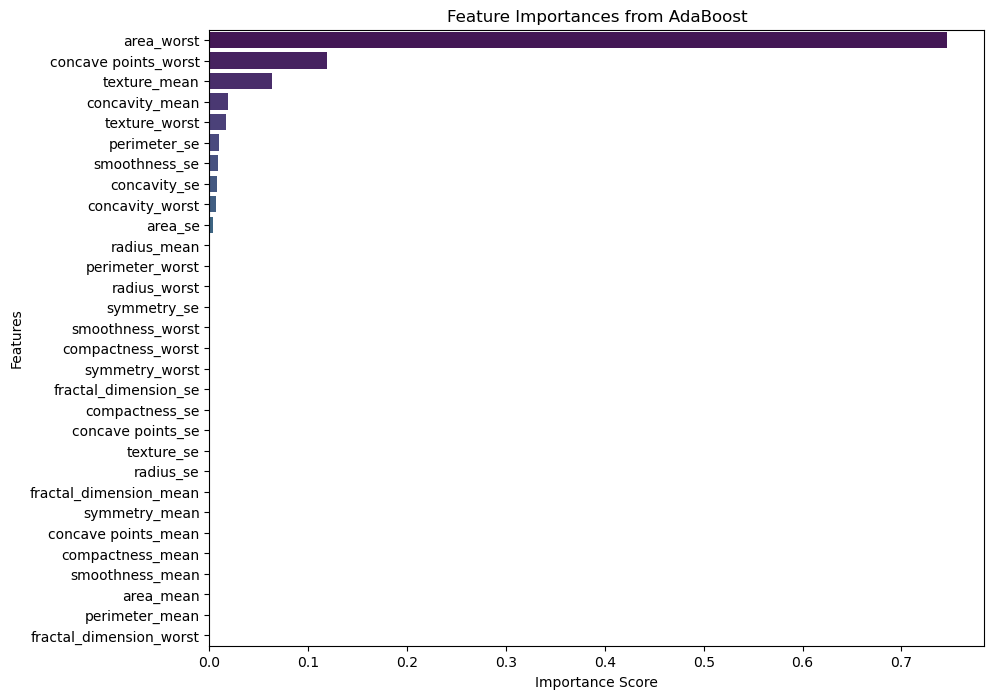


Feature Importances:
                    Feature  Importance
23               area_worst    0.746583
27     concave points_worst    0.118958
1              texture_mean    0.062814
6            concavity_mean    0.019009
21            texture_worst    0.016419
12             perimeter_se    0.009296
14            smoothness_se    0.008525
16             concavity_se    0.008119
26          concavity_worst    0.006975
13                  area_se    0.003302
0               radius_mean    0.000000
22          perimeter_worst    0.000000
20             radius_worst    0.000000
18              symmetry_se    0.000000
24         smoothness_worst    0.000000
25        compactness_worst    0.000000
28           symmetry_worst    0.000000
19     fractal_dimension_se    0.000000
15           compactness_se    0.000000
17        concave points_se    0.000000
11               texture_se    0.000000
10                radius_se    0.000000
9    fractal_dimension_mean    0.000000
8             symm

In [37]:
# 特徵重要性
feature_importances = ada.feature_importances_
feature_names = X_train.columns

# 創建 DataFrame 排序並視覺化
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances from AdaBoost')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# 印出特徵重要性表格
print("\nFeature Importances:")
print(importance_df)